# 0. 데이터 준비 및 구성

In [1]:
import pandas as pd
import numpy as np


# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 분류 SVM
from sklearn.svm import SVC

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier


# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter

In [2]:

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = 'NanumGothic')
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)


['NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumGothic']

In [3]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = 'NanumGothic')
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [4]:
df_raw = pd.read_csv("./통신고객이탈.csv", encoding='euc-kr')
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               930 non-null    object 
 1   CUSTOMER_ID         930 non-null    object 
 2   GENDER              930 non-null    object 
 3   AGE                 930 non-null    int64  
 4   CHARGE_TYPE         930 non-null    object 
 5   HANDSET             930 non-null    object 
 6   USAGE_BAND          930 non-null    object 
 7   SERVICE_DURATION    930 non-null    float64
 8   DROPPED_CALLS       930 non-null    int64  
 9   PEAK_CALLS_NO       930 non-null    int64  
 10  PEAK_CALLS_TIME     930 non-null    float64
 11  WEEKEND_CALLS_NO    930 non-null    int64  
 12  WEEKEND_CALLS_TIME  930 non-null    float64
 13  TOTAL_CALLS_NO      930 non-null    int64  
 14  TOTAL_CALLS_TIME    930 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usage: 109.1+ K

In [6]:
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

- 결측치가 없는 데이터 셋이다. 
- 목표변수 churn은 object 자료형이며, 설명변수들은 범주형과 연속형이 섞여있다.

## 데이터 셋 만들기 
 - 1. 연속형+더미형 DT, RF,GB
 - 2. scale 연속형+ 더미형 SVM, NN

In [7]:
df_raw=df_raw.drop("CUSTOMER_ID",axis=1, inplace=False)

In [8]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    Active
1    Active
2    Active
3    Active
4    Active
Name: CHURN, dtype: object

In [9]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


In [10]:
# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


'Dummy 변환 후:'

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,27,49.40,11,260,582.0,0,0.0,265,614.1
3,61,48.60,1,294,661.8,14,101.5,326,844.0
4,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [12]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,0,...,0,0,0,0,0,0,1,0,0,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,0,...,0,0,0,0,0,0,1,0,0,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
## 연속형 +범주형 데이터 데미데이터 만들기 
df_dummy_raw=pd.get_dummies(df_raw_x)

In [14]:
df_dummy_raw

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,19,17.40,12,60,100.8,27,59.4,127,628.2,0,...,0,1,0,0,0,0,1,0,0,0
926,59,17.37,15,82,130.2,12,25.8,357,650.7,1,...,0,0,1,0,0,0,1,0,0,0
927,33,44.93,12,174,286.2,25,67.0,596,1039.0,1,...,0,0,0,0,0,0,1,0,0,0
928,25,40.43,14,315,552.0,0,0.0,609,1188.3,1,...,0,0,0,0,0,0,1,0,0,0


In [15]:
df_dummy_raw.head()## 연속형+dummy변수

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [16]:
df_x_converted.head()## scale연속형+dummy변수 

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,0,...,0,0,0,0,0,0,1,0,0,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,0,...,0,0,0,0,0,0,1,0,0,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,1,...,0,0,0,0,0,0,1,0,0,0


In [17]:
df_raw_y=np.where(df_raw['CHURN']=='Active',1,0)

In [18]:
df_raw_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [76]:
# 데이터 분리 
df_train_x, df_test_x,df_train_y,df_test_y = train_test_split(df_x_converted, df_raw_y, # 데이터
                                     test_size = 0.3) # test 데이터의 비율
                                     #  # random state

print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))

train data size : (651, 33)
test data size : (279, 33)


# 실습 1. svm 서포트 벡터 머신 

In [20]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.909
Test Accuracy : 0.792


- 스탠다드 스케일러를 적용한 데이터 셋을 이용하여 서포트 벡터 머신으로 돌려본 결과 
- 모델의 정확도는 0.9이고 test데이터에 대한 일반화 성능은 0.8정도에 달했다.

In [21]:
# 실행옵션 확인
print(svm_uncust.get_params().keys())
print(svm_uncust.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [22]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [23]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.828,0.756
1,0.10,0.828,0.756
2,1.00,0.909,0.792
3,10.00,0.991,0.846
4,100.00,1.000,0.817


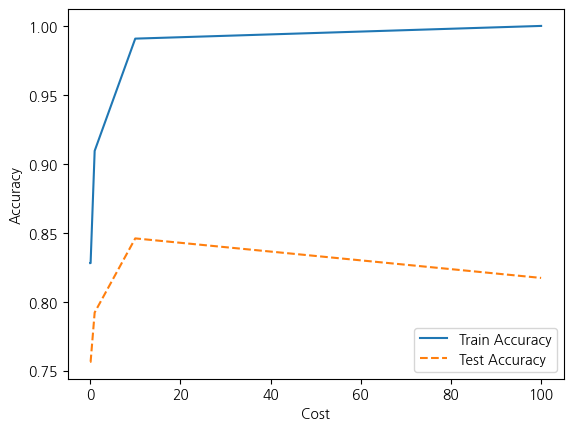

In [24]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

- 서포트 벡터 머신은 cost 즉 비용을 사용하여 파라미터를 조정한다. 
- 이 비용이란 것은 인접한 데이터에 대해 다른 클래스에 놓이는 오류를 허용하는지 여부로 결정된다. 이 비용이 커질수록 엄격해지며 모델이 복잡해지며 과대적합될 수 있다. 여기서는 적정 비용을 추정하기 위해 먼저 비용의 크기를 크게하여 추정하였다
- 그결과 10 정도에서 모델의 성능이 가장 좋았으며 이후 test데이터의 정확도가 내려가는 모습일 보인다.

In [77]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 30)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [78]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.799,0.824
1,0.2,0.799,0.824
2,0.3,0.799,0.824
3,0.4,0.799,0.824
4,0.5,0.802,0.824
5,0.6,0.813,0.824
6,0.7,0.849,0.832
7,0.8,0.869,0.835
8,0.9,0.891,0.842
9,1.0,0.902,0.853


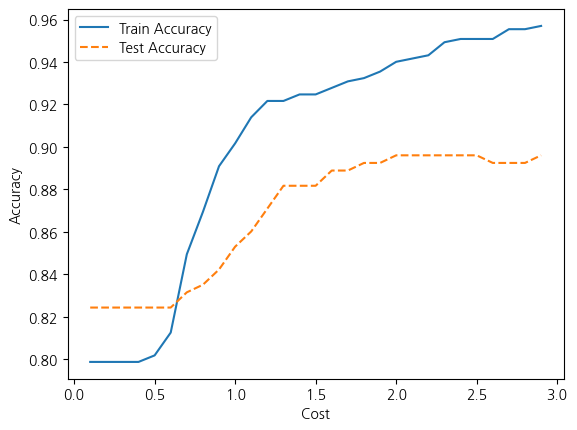

In [79]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

- 비용을 마치 학습률처럼 작게 해서 그 경과를 살펴본 것이다. 
- 0.1로 계산하였을때 1.5정도까지는 비용이 지속적으로 상승한 것을 볼수 있었다. 기존의 연습문제 코드에서 설정한 13은 비용의 상승을 끝까지 추적하지 못하는 것 같아 30까지 돌려보았다. 지속적으로 상승하고 있으나 2.0 이후부터는 상승폭이 미미한 것으로 보인다.

In [28]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [29]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.8280,0.7563
1,0.10,0.8817,0.7814
2,1.00,0.8633,0.7563
3,10.00,0.8280,0.7563
4,100.00,0.8280,0.7563


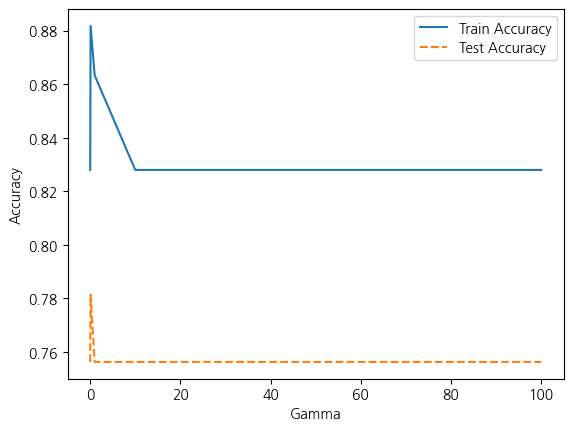

In [30]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

- gamma라는 파라미터를 완벽하게 이해하지 못해 내부적으로 어떤 결과를 나타내는지 이해하지 못하였다. 다만 이것이 모델의 최적화를 위해 사용되는 파라미터이며 책의 설명에 따르면 하나의 데이터가 동일한 클래스로 분류되게 하려는 영향력의 거리라고 한다. 
- gamma 값 역시 점차 크게 하여 처음부터 크게 상승폭을 두었으나 아주 초반에 모델의 정확도가 올라간 이후 다시 일정수준을 유지하는 것처럼 하락하였다.

In [31]:
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [32]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.8817,0.7814
1,0.2,0.9109,0.7814
2,0.3,0.9278,0.7670
3,0.4,0.9416,0.7599
4,0.5,0.9447,0.7599
5,0.6,0.9447,0.7563
6,0.7,0.9447,0.7563
7,0.8,0.9370,0.7563
8,0.9,0.8940,0.7563
9,1.0,0.8633,0.7563


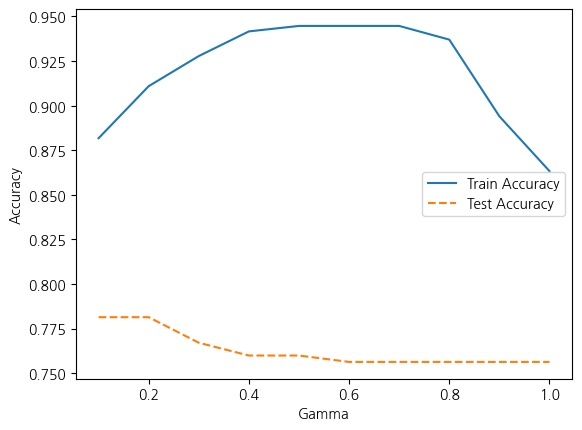

In [33]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

- gamma의 값이 0.2정도에서 가장 높은 값을 찍고 하락하였다. 아주 초기 작은 값에서만 반응하는 모습을 보였다.

In [80]:
# 최종 모델
svc_final = SVC(gamma=0.2, C=2.0, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.982
Test Accuracy : 0.860

Test Confusion matrix: 
[[ 17  32]
 [  7 223]]
              precision    recall  f1-score   support

           0      0.708     0.347     0.466        49
           1      0.875     0.970     0.920       230

    accuracy                          0.860       279
   macro avg      0.791     0.658     0.693       279
weighted avg      0.845     0.860     0.840       279



- 최종모델의 하이퍼 파라미터 값으로 감마와 비용을 적용해본결과이다. 
- 감마는 0.2 비용은 2.0을 적용해 보았다. 
- 평가지표를 살펴 보자면 먼저 정확도는 train데이터의 0.98로 거의 정확하게 맞춘다는 것을 알수있다. 반면에 test데이터에 대해서는 0.86으로 준수하지만 과대적합되어있는 모습을 볼수있었다.
- f1스코어에 경우에는 각 클래스 별로 차이가 많이 나지만 이는 불균형 데이터에 대해서 발생한 문제라고 생각된다. 따라서 이것을 가중 평균으로 살펴본바 f1스코어는 0.84정도로 나쁘지 않은 것을 볼수있다.

# 실습 2. 인공신경망

In [35]:
nn_uncust = MLPClassifier(random_state=1234)
nn_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(nn_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}".format(nn_uncust.score(df_test_x, df_test_y)))

Train Accuracy: 0.966
Test Accuracy: 0.853


In [36]:
# 실행옵션 확인
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [37]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [38]:
# 은닉층별 정확도
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.903,0.846
1,10,0.946,0.867
2,15,0.952,0.878
3,20,0.949,0.857
4,25,0.971,0.846
5,30,0.991,0.860
6,35,0.978,0.860
7,40,0.994,0.860
8,45,0.998,0.864
9,50,1.000,0.842


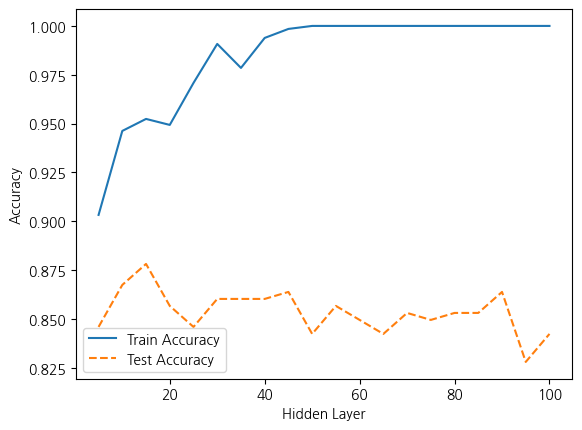

In [39]:
# 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

- 인공신경망은 입력층과 출력층 사이에 은닉층을 쌓아 만든 모델이다. 이 히든 레이어의 수는 은닉층의 깊이를 나타낸다. 
- 여기서 사용된 사이즈는 2개로 점차 적으로 10단위씩 100까지 노드의 개수를 늘려보았다. 
- 그결과 train의 정확도는 40 이전에서 급격하게 상승하여 거의 1에 근사하여지고 반면 test 성능에 대해서는 20 이전에 0.875로 가장 높은 모습을 보였다.

In [40]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes=(80,80), random_state = 1234)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state = 1234) # 변경 가능
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [41]:
# Activation Function별 정확도 
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.925,0.857
1,tanh,0.982,0.875
2,relu,1.000,0.853


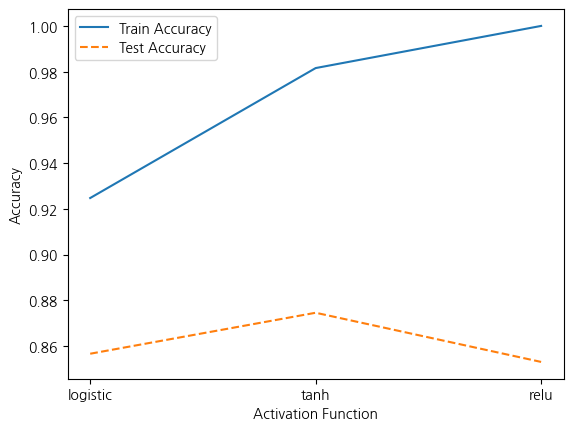

In [42]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Activation Function")
plt.legend()

- 활성화 함수는 인경신경망 모델의 선형을 비선형으로 변환시켜주는 함수이다. 
- 세가지 대표적인 활성화 함수를 토대로 넣어서 사용해 봤을때 하이퍼 볼릭 탄젠트가 가장 test의 성능이 좋았으나 train데이터와는 차이가 여전히 심하였다.

In [43]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="relu", hidden_layer_sizes=(80,80), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

In [44]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.817
1,sgd,0.846,0.763
2,adam,1.000,0.853


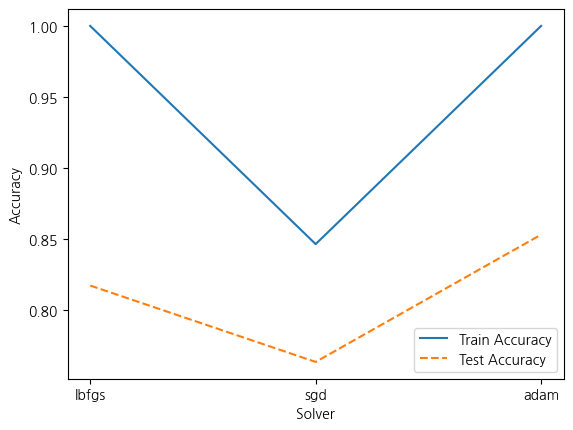

In [45]:
# 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Solver")
plt.legend()

- 이번에는 solver를 인공신경망에서 사용하는 최적화 알고리즘이다. 따라서 최적화 변수등 다양한 이름으로 사용된다. 세가지 solver를 살펴본결과 sgd가 가장 낮은 성능을 보여주었다. 
- sgd가 대규모 데이터셋에 적당하다는 점을 고려해본다면 의외의 결과이다. 다만 그 차이가 크지는 않았으며 데이터 셋의 규모가 더 커지거나 달라진다면 다른 결과가 나올수도 있다.
- adam이 가장 높은 성능을 보여주었다.
- 일반적으로는 adam을 사용해도 되지 않을까


In [46]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경
para_batch = [20 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu", 
                       hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[20, 40, 60, 80, 100, 120, 140, 160, 180]


In [47]:
# Mini Batch 별 정확도 
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.846
1,40,1.0,0.849
2,60,1.0,0.846
3,80,1.0,0.853
4,100,1.0,0.835
5,120,1.0,0.839
6,140,1.0,0.842
7,160,1.0,0.842
8,180,1.0,0.835


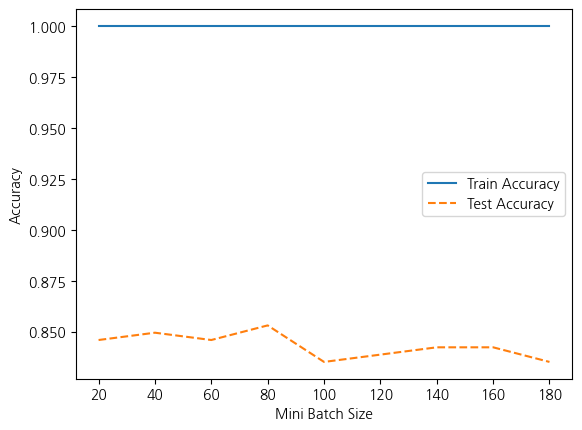

In [48]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

- 이번에는 배치사이즈를 달리하여 사용해보았다. 
- 이는 전체 데이텟을 나누어 사용하는 것으로 변동성을 최소화하고 성능 개선을 위해 사용될 수 있을 것이다 
- 배치사이즈를 20부터 180정도 까지 살펴보았으나 배치사이즈에따른 차이는 크게 벌어지지 않았다. 80정도의 수준에서 성능이 높다고 볼수도 있을것이나 너무 큰 배치사이즈는 데이터 셋의 규모가 크지 않음을 감안할때 지양하는 것이 좋다고 느껴진다.

In [49]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []
# 학습률 변경
# para_lr = [0.01 * lr for lr in range(1, 10)] 
para_lr = [10 ** lr for lr in range(-3, 1)] 

print(para_lr)

for v_lr in para_lr:
    nn = MLPClassifier(learning_rate_init = v_lr, solver = "adam", activation = "relu", 
                       hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

[0.001, 0.01, 0.1, 1]


In [50]:
# 학습률별 정확도 
df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy
0,0.001,1.000,0.853
1,0.010,1.000,0.857
2,0.100,0.965,0.864
3,1.000,0.828,0.753


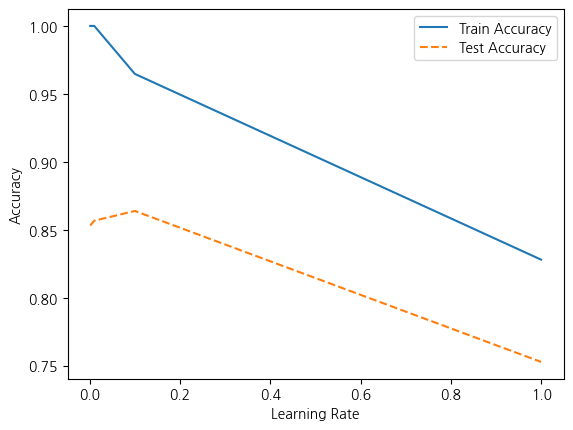

In [51]:
# 모델 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Learning Rate")
plt.legend()

- 학습률은 모델의 가중치를 조절하는 중요한 역활을 한다. 0.1 단위로 작게 하여 학습률을 골랐으나 학습률이 상승할수록 오히려 train test 두 데이터 모두 성능이 하락하는 모습을 보여주었다. 따라서 학습률은 0.1 정도가 가장 적당한 것으로 보인다.

In [52]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(80, 80), activation="relu", solver="adam",random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 1.000
Test Accuracy : 0.853

Test Confusion Matrix: 
[[ 40  28]
 [ 13 198]]
              precision    recall  f1-score   support

           0      0.755     0.588     0.661        68
           1      0.876     0.938     0.906       211

    accuracy                          0.853       279
   macro avg      0.815     0.763     0.784       279
weighted avg      0.847     0.853     0.846       279



- 이를 통해 최종 모델의 하이퍼 파라미터를 설정하였다. 모델의 활성화 함수는 relu를 이용하고 최적화 함로 adam을 사용하였다. 이모델은 80개의 노드를 가진진 각각의 2층 구조로 학습한다. 
- 이에 성능을 살펴보면 train데이터의 정확도가 1.0이므로 과대적합 문제가 발생했음을 알수있다. 문제는 역시나 클래스 불균형 문제때문으로 보인다. 
- f1 스코어의 점수를 확인해보자면 가중평균 f1스코어는 0.84이다.

#  실습 3. 모델 평가

In [53]:

df_train_x, df_test_x,df_train_y,df_test_y = train_test_split(df_dummy_raw, df_raw_y, # 데이터
                                     test_size = 0.3) # test 데이터의 비율
                                     #  # random state

print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))

train data size : (651, 33)
test data size : (279, 33)


- 모델 평가에서 사용되는 모델은 의사결정나무, 인공신경망, 그레디언트 부스팅, 랜덤포레스트이다. 
- 이중 인공신경망을 제외한 나머지 모델에서 사용할 데이터 셋은 표준화 작업을 거치지 않고 dummy작업을 한 일반 데이터 셋이다.

In [54]:
# 분석 모델 리스트
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [55]:
# 최종모델
dt_final = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
dt_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(dt_final.score(df_train_x, df_train_y))
test_accuracy.append(dt_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = dt_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = dt_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[ 36  16]
 [ 11 216]]
              precision    recall  f1-score   support

           0      0.766     0.692     0.727        52
           1      0.931     0.952     0.941       227

    accuracy                          0.903       279
   macro avg      0.848     0.822     0.834       279
weighted avg      0.900     0.903     0.901       279



In [56]:
print("P(y=1) 확률...", y_prob_1)
print()
print("1/0-판정...",y_pred)

P(y=1) 확률... [0.99530516 0.99530516 0.09090909 0.2173913  0.70967742 1.
 0.69444444 0.99530516 0.69444444 0.98148148 0.09090909 0.78571429
 0.98148148 0.98148148 0.99530516 0.69444444 0.93975904 0.70967742
 0.79545455 0.99530516 0.79545455 1.         0.93975904 0.93975904
 1.         0.2173913  0.99530516 0.99530516 0.99530516 0.78571429
 0.79545455 0.99530516 0.99530516 0.79545455 0.99530516 0.99530516
 0.69444444 0.19047619 0.99530516 0.78571429 0.99530516 0.99530516
 0.93975904 0.19047619 0.19047619 0.37037037 0.79545455 0.99530516
 0.98148148 0.69444444 0.79545455 1.         0.99530516 0.98148148
 0.70967742 0.99530516 0.98148148 0.99530516 0.09090909 0.19047619
 0.93975904 1.         0.99530516 0.09090909 0.99530516 0.78571429
 0.99530516 0.99530516 1.         0.98148148 0.93975904 0.99530516
 0.79545455 0.37037037 0.37037037 0.79545455 0.78571429 0.93975904
 0.79545455 0.98148148 0.19047619 0.99530516 0.2173913  0.2173913
 0.19047619 0.79545455 0.78571429 0.98148148 0.99530516 0.

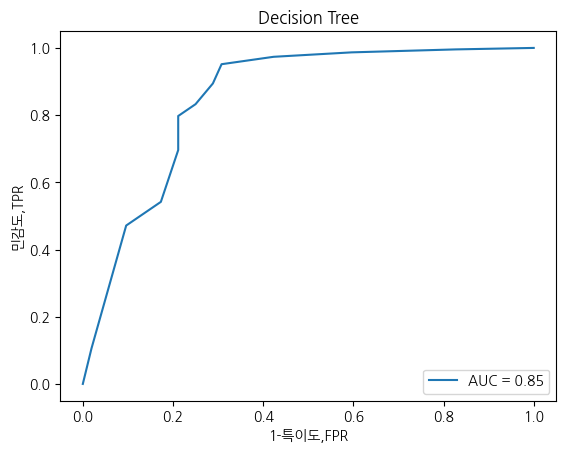

In [57]:
plt.title("Decision Tree")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [58]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.9411764705882353]

- 모델의 f1 스코어는 0.94로 상당히 높게 나타났다. 이유를 모르겠다. 위 결과에서 가중평균 f1스코어의 크기가 0.9로 이또한 높은 축에 속하는데 f1스코어가 그것보다 높게 나타났다. 
- 클래스 불균형 문제가 있는데 다수 클래스의 성능이 매우 좋은 듯하여 f1스코어의 점수가 높게 나온듯하다.

In [59]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=20, max_depth=6, n_estimators=100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = rf_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = rf_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[  7  45]
 [  1 226]]
              precision    recall  f1-score   support

           0      0.875     0.135     0.233        52
           1      0.834     0.996     0.908       227

    accuracy                          0.835       279
   macro avg      0.854     0.565     0.570       279
weighted avg      0.842     0.835     0.782       279



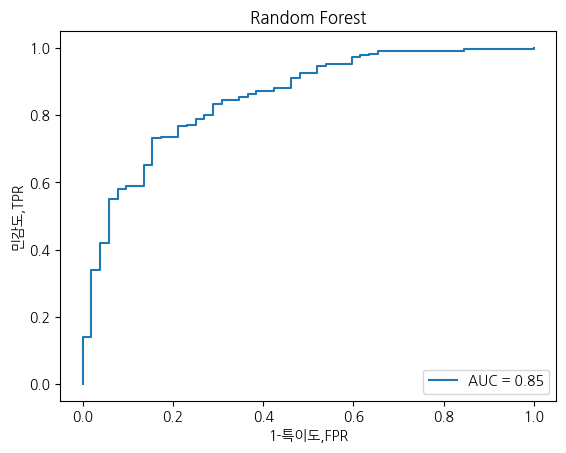

In [60]:
plt.title("Random Forest")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [61]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.9411764705882353, 0.9076305220883534]

- 랜덤포레스트에서도 일반 fi스코어가 0.9로 상당히 높게 나왔다. 앞서 의사결정나무와 차이가 있는 것은 가중평균 f1 스코어가 0.74정도로 낮게 나왔는데 그 차이가 벌어진 것이다. 
- 이는 클래스 불균형 문제에서 여전히 랜덤포레스트가 다수 클래스에 대해 높은 정확도를 내기때문에 그런것으로 보인다. 

In [62]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100,
			 learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = gb_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = gb_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[ 35  17]
 [ 11 216]] 

              precision    recall  f1-score   support

           0      0.761     0.673     0.714        52
           1      0.927     0.952     0.939       227

    accuracy                          0.900       279
   macro avg      0.844     0.812     0.827       279
weighted avg      0.896     0.900     0.897       279



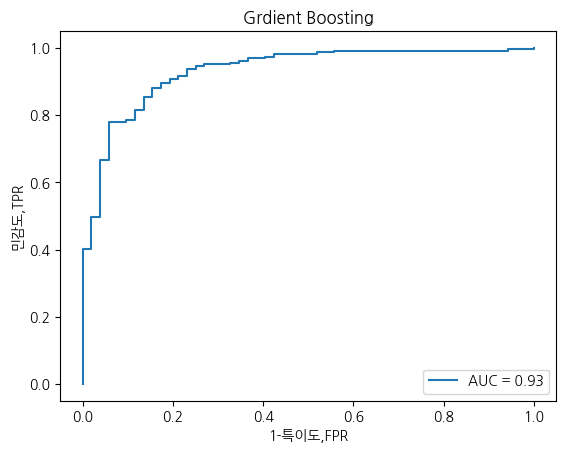

In [63]:
plt.title("Grdient Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [64]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.9411764705882353, 0.9076305220883534, 0.9391304347826086]

- 그레디언트 부스트는 특이하게 f1스코어가 0.93으로 높게 나오면서 auc가 0.93으로 마찬가지로 높게 나왔다. 
- 이는 두 클래스의 구분과 예측 성능이 좋다는 것을 의미한다는데 이를 증명하듯 가중평균 f1도 0.9에 가까울 정도로 높게 나와 클래스 불균형 문제에도 불구하고 모델의 일반적인 성능이 좋은 것으로 확인 되었다.

In [65]:

df_train_x_nn, df_test_x_nn,df_train_y_nn,df_test_y_nn = train_test_split(df_x_converted, df_raw_y, # 데이터
                                     test_size = 0.3) # test 데이터의 비율
                                     #  # random state

print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))

train data size : (651, 33)
test data size : (279, 33)


In [66]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(80, 80), activation="relu", solver="adam", random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(nn_final.score(df_train_x_nn, df_train_y_nn))
test_accuracy.append(nn_final.score(df_test_x_nn, df_test_y_nn))

# 예측값
y_prob_1 = nn_final.predict_proba(df_test_x_nn)[:, 1]  # 1 발생 확률
y_pred = nn_final.predict(df_test_x_nn)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y_nn, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y_nn, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[  1  51]
 [ 14 213]] 

              precision    recall  f1-score   support

           0      0.933     0.250     0.394        56
           1      0.841     0.996     0.912       223

    accuracy                          0.846       279
   macro avg      0.887     0.623     0.653       279
weighted avg      0.859     0.846     0.808       279



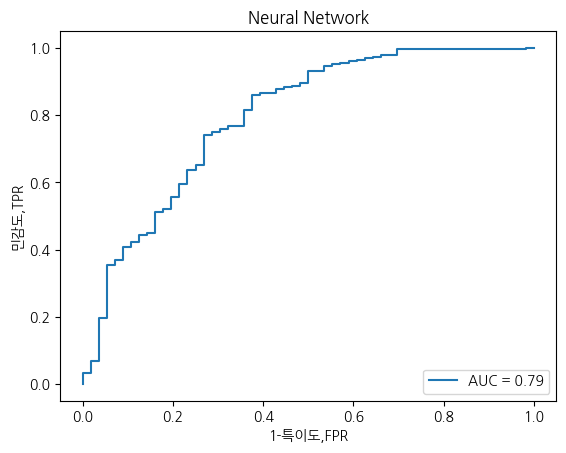

In [67]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [68]:
# precision, recall score
model_precision.append(precision_score(df_test_y_nn, y_pred))
model_recall.append(recall_score(df_test_y_nn, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y_nn, y_pred))
model_f1_score

[0.9411764705882353,
 0.9076305220883534,
 0.9391304347826086,
 0.9117043121149897]

- 인공신경망은 일반 f1스코어가 0.91정도로 높게 나왔으나 AUC가 0.79로 상대적으로 낮았다. 
- 가중 평균 f1도 0.8정도로 나쁘지는 않지만 눈에 띄게 차이가 벌어져 보인다. 따라서 인공지능은 클래스 불균형 문제를 극복하지 못하고 모델의 성능이 뚜렷하게 좋지는 못하는 것으로 보인다. 

In [69]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.902,0.903,0.850,0.931,0.952,0.941
RandomForest,0.839,0.835,0.852,0.834,0.996,0.908
GradientBoosting,0.998,0.900,0.932,0.927,0.952,0.939
NeuralNet,0.843,0.846,0.793,0.841,0.996,0.912


In [70]:
df_eval.T

,DecisionTree,RandomForest,GradientBoosting,NeuralNet
TrainAccuracy,0.901690,0.838710,0.998464,0.843318
TestAccuracy,0.903226,0.835125,0.899642,0.845878
AUC,0.850432,0.852253,0.931549,0.793081
Precision,0.931034,0.833948,0.927039,0.840909
Recall,0.951542,0.995595,0.951542,0.995516
F1Score,0.941176,0.907631,0.939130,0.911704


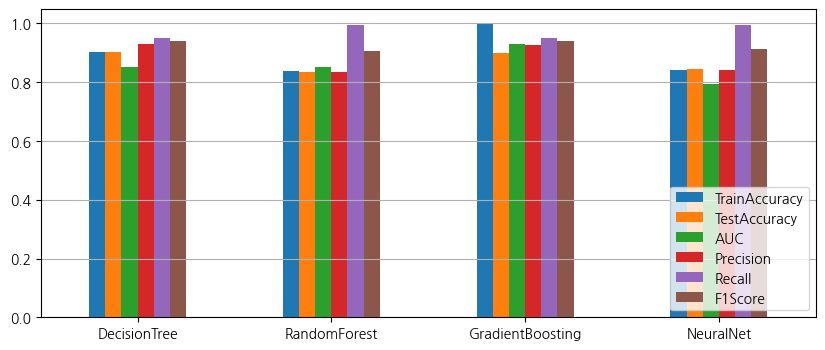

In [71]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right"); plt.grid(axis = "y")

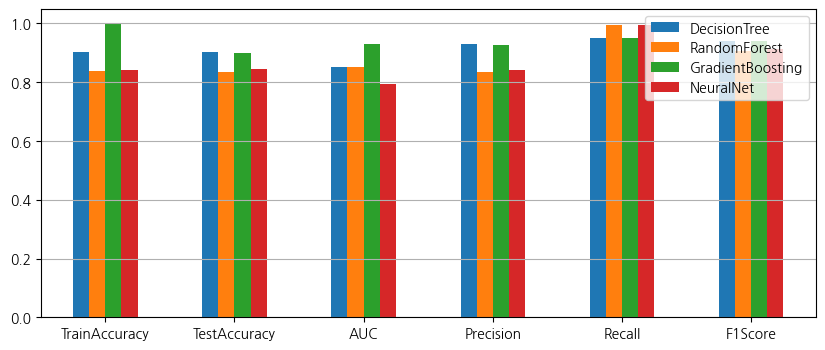

In [72]:
# Data 전치하여 지표 기준으로 모델 성능 평가 
df_eval.T.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="upper right"); plt.grid(axis = "y")

- 마지막으로 네 모델의 평가지표를 토대로 모델을 선택해야한다면 상황에 따라 다르다고 볼수있다. 
- 교수님의 말씀에 따르면 우리는 의사결정을 위해 낮은 성능에도 불구하고 의사결정나무를 선택해야할수도 있으며 이는 의사결정나무가 임계값을 제시해주기때문이다. 
- 그러나 단순히 이탈 여부를 선택해야한다면 포괄적인 면에서 정밀도와 재현률이 준수하게 나오고 f1스코어가 가장 잘 나온 그레디언트 부스팅을 선택할 수 있을 것이다. 